# Basic statistics on Discrete Event Simulation (DES) systems:

## Random sampling:

Let's generate N observations of an univariate variable following a normal distribution with mean $\mu$ and standard deviation $\sigma$:

In [1]:
import numpy as np
N = 1000
mu = 0.6
sigma = 0.1
x = np.random.normal(mu, sigma, N)

Plot the histogram with nbins bins: 

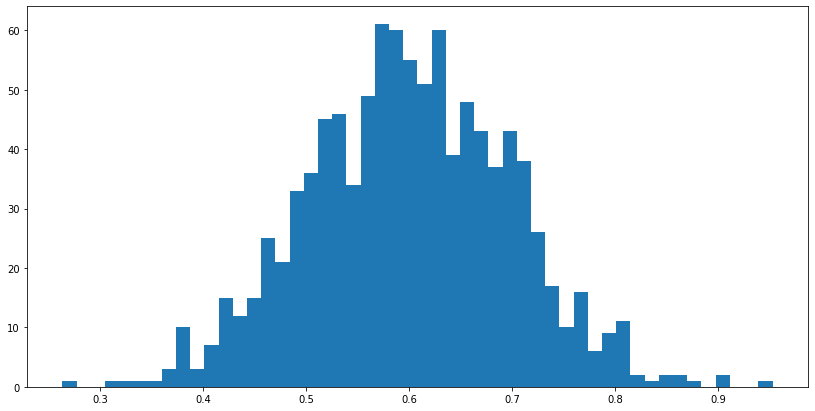

In [2]:
import matplotlib.pyplot as plt

nbins = 50
fig = plt.figure(figsize=(14,7))
plt.hist(x,50)
plt.show()

Random generation of inter-arrival times and service times:

Consider a system in which parts arrive to a robotic station with an uniform probability distribution with a range from 1 to 3 minutes $U(1,3)$. The service times of the robotic station follows a gaussian distribution with mean 1.3 minutes and a standard deviation of 0.6 minutes. To generate a random sample of $N=200$ inter-arrival times and service times we proceed as follows: 


In [4]:
N = 200
inter_arrivals = np.random.uniform(low=1,high=4,size=N)
print('Inter arrivals {}'.format(inter_arrivals))
service_times = x = np.random.normal(1.3, 0.3, N)
print('service times {}'.format(service_times))

Inter arrivals [2.05316663 2.41084342 1.75539686 3.42992311 3.64448991 2.08956103
 3.31786335 1.8466544  1.06112994 3.22989867 2.46662034 3.02436227
 2.81555049 3.89895576 3.95636941 3.27374508 3.13459485 3.66872833
 1.17279533 1.17258169 3.96508123 3.1048684  3.18322998 3.15331963
 1.41849876 2.35998056 2.38617663 1.15713399 2.15243723 2.50959981
 3.23592156 3.92536776 1.11989046 3.21934305 3.39078071 1.85516561
 3.40620359 3.96244904 2.50167515 3.11207405 1.55357726 2.84908708
 3.70767454 1.04361529 3.9437415  1.9592733  2.95972062 1.93306058
 2.48969472 3.97053261 1.95155393 3.34748285 3.32625055 1.26580543
 2.59302759 2.96313547 3.47688946 1.04128233 2.92523536 1.51653059
 2.74075465 2.74306476 1.26846296 2.48802274 2.08714593 1.60274078
 3.94596759 2.33038549 2.13069851 3.60403395 3.98324684 2.60677323
 2.63057048 1.94571259 1.4013941  2.58245073 1.42577491 1.96822965
 2.6593484  1.00524663 3.07911173 2.11541196 1.50127308 3.88944592
 2.60120946 3.7551395  1.67503066 1.47520533 1.

## Hypothesis testing: t-test

# Hypothesis testing

Consider a sample of $n=25$ simulations of a DES system in which each simulation provides an estimation of the queue length of a machine. The values are the following: 

In [5]:
x_DES = [ 1.54805813,  1.00602165,  1.37433824,  1.79220994,  0.93106753,
        1.20733477,  0.51645397,  1.81174653,  1.17998772,  1.46656456,
        0.6901881 , -0.07863154,  1.73071763,  0.53812963,  1.87345268,
        0.45561314,  1.4413871 ,  1.55092039,  0.81818829,  1.28637081,
        1.05006276,  1.34923019,  1.16052882,  1.49266933,  2.03781074]

In [11]:
x_DES = [5.37, 1.98, 5.29, 3.82, 6.74, 5.49]

The sample mean is 

In [12]:
import numpy as np
np.mean(x_DES)

4.781666666666667

Test the hypothesis that the average queue length of the system is $\mu_0 = 1.2$

In [13]:
# Standardized Test Statistic
NSIMUL = len(x_DES)
sample_mean = np.mean(x_DES) # sample mean
sample_std = np.std(x_DES,ddof=1) # sample standard deviation
sem = sample_std/np.sqrt(NSIMUL) #standard error of the mean

print('Sample mean = {}, sample std = {} and s.e.m = {}'.format(sample_mean,sample_std,sem))

Sample mean = 4.781666666666667, sample std = 1.656229653963081 and s.e.m = 0.6761529248459833


Get the observed and critical t-statistic values at the $95\%$ significance level ($\alpha= 0.05$):

In order to get the critical t-value 

$t_{\alpha/2,\text{df}}$

you need the Percent point function (inverse of cdf — percentiles): https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [17]:
from scipy.stats import t
mu_0 = 4.25
tstar = np.abs((sample_mean-mu_0)/sem)
t = t.ppf(0.975,NSIMUL-1)

The condifence interval for the sample estimation of the sample mean at the $95\%$ significance level ($\alpha= 0.05$) is given by:


$[\mu_{sample} - t_{\alpha/2,\text{df}} \frac{\sigma_{sample}}{\sqrt{N}} , \mu_{sample} + t_{\alpha/2,\text{df}} \frac{\sigma_{sample}}{\sqrt{N}} ]$


Three equivalent but different ways to check the hypothesis:

1. if $\mu_0$ is included in the confidence interval the null hypothesis can not be rejected


In [18]:
print('Conficende Internval = [{},{}]'.format(sample_mean - t*sem,sample_mean + t*sem))
(mu_0 > sample_mean - t*sem) & (mu_0 < sample_mean + t*sem)

Conficende Internval = [3.0435602392836514,6.5197730940496825]


True

2. If $|t^*| < t$ there is not enough evidence to reject the null hypothesis that $\mu_{sample} = \mu_0$

In [19]:
print('t star = {}'.format(tstar))
print('t = {}'.format(t))

t star = 0.7863112723911861
t = 2.5705818366147395


In [ ]:
np.abs(tstar) < t

True

3. Obtain the proabability of a Type I error ($\alpha$) of erroneosuly rejecting a correct null hypothesis. Null hypothesis can be rejected when the p-value is lower than 0.05:

$\alpha$ = Prob(type I error) 

In [20]:
from scipy.stats import t
p = 2*(1-t.cdf(tstar,NSIMUL-1))  

print('p-value = {}'.format(p))

p-value = 0.46729723997929007


If $p<0.05$, we reject the null hypothesis that the machine has a mean queue length of $\mu_0$

Now with the scipy libraries

In [21]:
from scipy import stats
stats.ttest_1samp(x_DES, 4.25)

Ttest_1sampResult(statistic=0.7863112723911863, pvalue=0.46729723997929007)

## Power Analysis:

Let's consider that there is no sufficient statistical evidence to reject the null hypothesis. Then we should determine the probability of a type II error, that is when the null hypothesis is not true but we failed to reject it due to limitations in the sample size or to large variability in the sample. 

Then we define 

$\beta$ = Prob(Type II error)

We need to specify the standardized effect size that we want to detect, i.e., the normalized deviations from the sample mean:

$\delta = \frac{\mu_{sample} - \mu_1}{\sigma_{sample}/\sqrt{n}}$

Imageine that we want to detect deviations of 0.1 from the sample mean, then the effect size would be

In [26]:
effect_size = 0.1/sem
print('effect size = {}'.format(effect_size))

effect size = 0.14789553712686873


In [27]:
from statsmodels.stats.power import ttest_power, tt_ind_solve_power

n = tt_ind_solve_power(effect_size=1,alpha=0.05,power=0.8,ratio=1.0, alternative='two-sided')
power = tt_ind_solve_power(effect_size=1,nobs1= NSIMUL,alpha=0.05,ratio=1.0, alternative='two-sided')

print('Number of simulations needed: {}'.format(n))
print('Statistical power achieved with current simulations: {}'.format(power))
print('Probability of type II error: {}'.format(1-power))

Number of simulations needed: 16.71472257227619
Statistical power achieved with current simulations: 0.3473536967037645
Probability of type II error: 0.6526463032962355


More stuff

In [46]:
from scipy.stats import t
NSIMUL = 10
t.ppf(0.975,NSIMUL-1)

for kn in range(10,50,1):
  tt = t.ppf(0.975,kn)
  print('t for {}  = {}'.format(kn,tt))

t for 10  = 2.2281388519649385
t for 11  = 2.200985160082949
t for 12  = 2.1788128296634177
t for 13  = 2.1603686564610127
t for 14  = 2.1447866879169273
t for 15  = 2.131449545559323
t for 16  = 2.1199052992210112
t for 17  = 2.1098155778331806
t for 18  = 2.10092204024096
t for 19  = 2.093024054408263
t for 20  = 2.0859634472658364
t for 21  = 2.079613844727662
t for 22  = 2.0738730679040147
t for 23  = 2.0686576104190406
t for 24  = 2.0638985616280205
t for 25  = 2.059538552753294
t for 26  = 2.055529438642871
t for 27  = 2.0518305164802833
t for 28  = 2.048407141795244
t for 29  = 2.045229642132703
t for 30  = 2.0422724563012373
t for 31  = 2.0395134463964077
t for 32  = 2.036933343460101
t for 33  = 2.0345152974493383
t for 34  = 2.032244509317718
t for 35  = 2.0301079282503425
t for 36  = 2.0280940009804502
t for 37  = 2.0261924630291093
t for 38  = 2.024394164575136
t for 39  = 2.022690911734728
t for 40  = 2.0210753829953374
t for 41  = 2.0195409639828936
t for 42  = 2.01808169

In [35]:
from scipy.stats import norm
norm.ppf(0.975)

1.959963984540054

In [43]:
x_vec = [3.25,17.83,15.43,7.71,3.11,4.91,9.45,5.27,6.24,11.07]
NSIMUL = len(x_vec)
sample_mean = np.mean(x_vec) # sample mean
sample_std = np.std(x_vec,ddof=1) # sample standard deviation
sem = sample_std/np.sqrt(NSIMUL) #standard error of the mean
print('Sample mean = {}, sample std = {} and s.e.m = {}'.format(sample_mean,sample_std,sem))

Sample mean = 8.426999999999998, sample std = 5.03537717885496 and s.e.m = 1.5923260763214715


In [61]:
epsilon=2
Rmin = np.int(np.ceil((norm.ppf(0.975)*sample_std/epsilon)**2))
Rmin

25

In [62]:
norm.ppf(0.975)

1.959963984540054

In [65]:
for kn in range(Rmin,2*Rmin,1):
  tt = t.ppf(0.975,kn-1)
  print('t for {}  = {}'.format(kn,(tt*sample_std/epsilon)**2))

t for 25  = 27.001054160382505
t for 26  = 26.88709459818864
t for 27  = 26.782519217044214
t for 28  = 26.686215737198072
t for 29  = 26.597240841385286
t for 30  = 26.514789287893095
t for 31  = 26.438169555893186
t for 32  = 26.366784467070175
t for 33  = 26.300115636996427
t for 34  = 26.237710901841158
t for 35  = 26.179174077021877
t for 36  = 26.12415655857572
t for 37  = 26.072350391861825
t for 38  = 26.023482517097232
t for 39  = 25.977309982142394
t for 40  = 25.933615612422315
t for 41  = 25.892205657326993
t for 42  = 25.852905380384524
t for 43  = 25.815557627189104
t for 44  = 25.780020468696762
t for 45  = 25.74616540160733
t for 46  = 25.713875798029104
t for 47  = 25.683045565060972
t for 48  = 25.653577981872626
t for 49  = 25.62538468746047


In [60]:
Rmin

25.0